In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

/home/vlad/miniconda3/envs/yolov8/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_frame = pd.read_csv('../ANN_part2/mnist_train.csv', delimiter=',')
data = data_frame.to_numpy()

labels = data[:, 0]
data = data[:, 1:]

print(labels.shape)
print(data.shape)

(60000,)
(60000, 784)


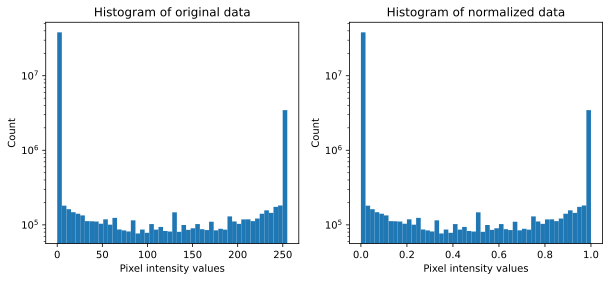

In [3]:
# normalize data to a range of [0, 1]
data_norm = data / np.max(data)

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(data.flatten(), 50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')
ax[0].set_yscale('log')

ax[1].hist(data_norm.flatten(), 50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')
ax[1].set_yscale('log')

plt.show()

In [4]:
dataT = torch.tensor(data_norm).float()

In [5]:
def create_model():
    class MnistNet(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.input = nn.Linear(784,250)
            
            self.enc = nn.Linear(250, 50)
            
            self.lat = nn.Linear(50, 250)
            
            self.dec = nn.Linear(250, 784)
            
            
        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.enc(x))
            x = F.relu(self.lat(x))
            
            y = torch.sigmoid(self.dec(x))
            
            return y
        
    model = MnistNet()
    
    loss_fun = nn.MSELoss()
    
    optimizer = torch.optim.Adam(model.parameters(), lr=.001)
    
    return model, loss_fun, optimizer

In [6]:
model, loss_fun, optimizer = create_model()

X = dataT[:5, :]
yHat = model(X)

print(X.shape)
print(yHat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


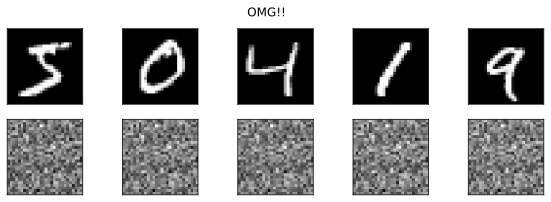

In [7]:
fig, axs = plt.subplots(2, 5, figsize=(10, 3))
for i in range(5):
    axs[0, i].imshow(X[i, :].view(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(yHat[i, :].view(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([]), axs[0, i].set_yticks([])
    axs[1, i].set_xticks([]), axs[1, i].set_yticks([])
    
plt.suptitle('OMG!!')
plt.show()

In [8]:
num_of_epochs = 10000
def train_model():
    model, loss_func, optimizer = create_model()
    
    losses = torch.zeros(num_of_epochs)

    
    for epoch in range(num_of_epochs):
        
        randomidx = np.random.choice(dataT.shape[0], size=32)
        X = dataT[randomidx, :]
                
        yHat = model(X)
        loss = loss_func(yHat, X)
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
        losses[epoch] = loss.item()
        
    return losses, model

Final loss: 0.0076


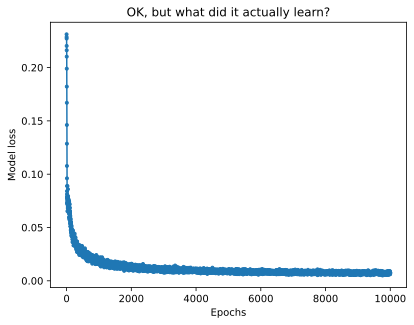

In [9]:
losses, model = train_model()

print(f"Final loss: {losses[-1]:.4f}")

plt.plot(losses, '.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('OK, but what did it actually learn?')
plt.show()

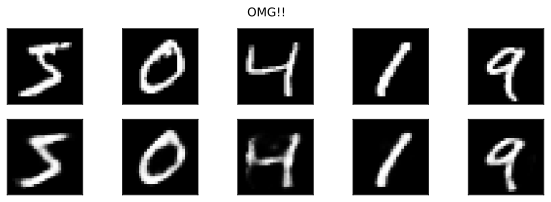

In [10]:
X = dataT[:5, :]
yHat = model(X)

fig, axs = plt.subplots(2, 5, figsize=(10, 3))
for i in range(5):
    axs[0, i].imshow(X[i, :].view(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(yHat[i, :].view(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([]), axs[0, i].set_yticks([])
    axs[1, i].set_xticks([]), axs[1, i].set_yticks([])
    
plt.suptitle('OMG!!')
plt.show()

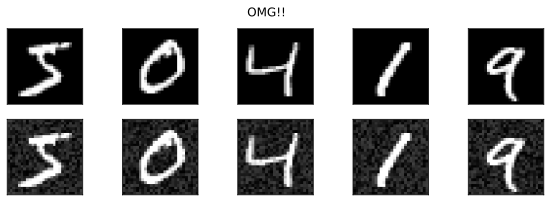

In [11]:
X = dataT[:10, :]
X_noise = X + torch.rand_like(X)/4

X_noise[X_noise>1] = 1


fig, axs = plt.subplots(2, 5, figsize=(10, 3))
for i in range(5):
    axs[0, i].imshow(X[i, :].view(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(X_noise[i, :].view(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([]), axs[0, i].set_yticks([])
    axs[1, i].set_xticks([]), axs[1, i].set_yticks([])
    
plt.suptitle('OMG!!')
plt.show()

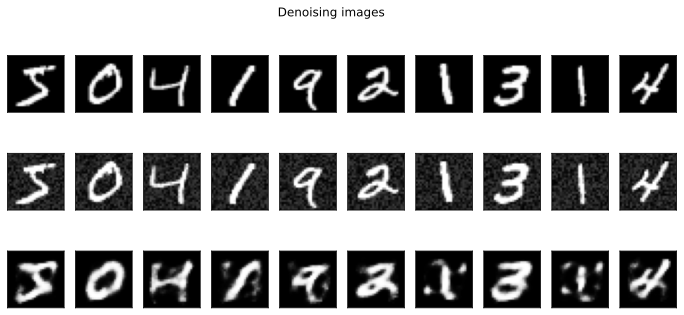

In [12]:
Y = model(X_noise)

fig, axs = plt.subplots(3, 10, figsize=(12, 5))
for i in range(10):
    axs[0, i].imshow(X[i, :].view(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(X_noise[i, :].view(28, 28).detach(), cmap='gray')
    axs[2, i].imshow(Y[i, :].view(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([]), axs[0, i].set_yticks([])
    axs[1, i].set_xticks([]), axs[1, i].set_yticks([])
    axs[2, i].set_xticks([]), axs[2, i].set_yticks([])
    
plt.suptitle('Denoising images')
plt.show()